In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import pickle

In [2]:
# Reading the csv data
df =pd.read_csv(r'/Users/anjali/Documents/Projects/online payments fraud detection/data/PS_20174392719_1491204439457_log.csv')


In [3]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [5]:
df.drop(['isFlaggedFraud'], axis = 1, inplace = True)

In [6]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1


In [7]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [8]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1


In [9]:
plt.style.use('ggplot')
warnings.filterwarnings('ignore')

In [10]:
# checking for correlation
df.corr(numeric_only=True)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


Heat Map

<Axes: >

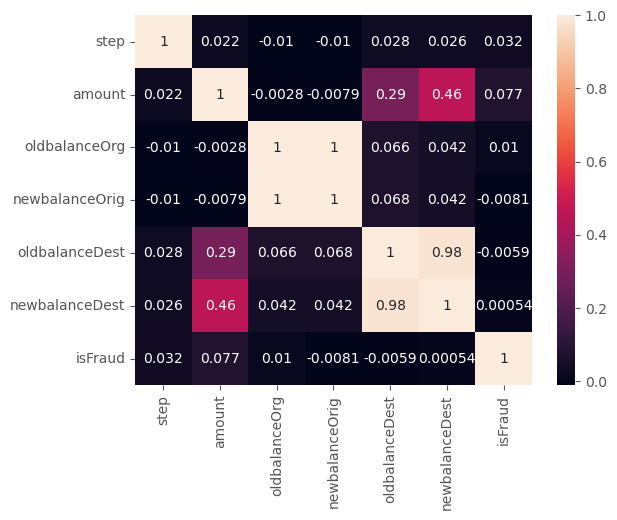

In [11]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

Univariate analysis

<Axes: xlabel='step', ylabel='Count'>

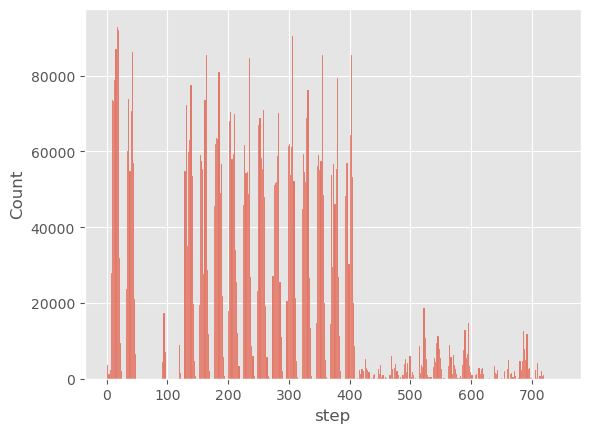

In [12]:
#step
sns.histplot(data=df,x='step')

<Axes: xlabel='step'>

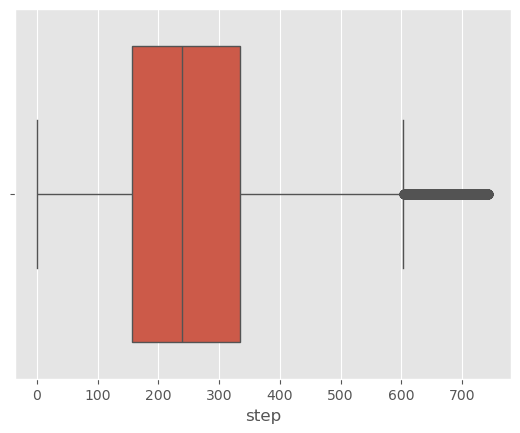

In [13]:
sns.boxplot(data=df,x='step')

<Axes: xlabel='type', ylabel='count'>

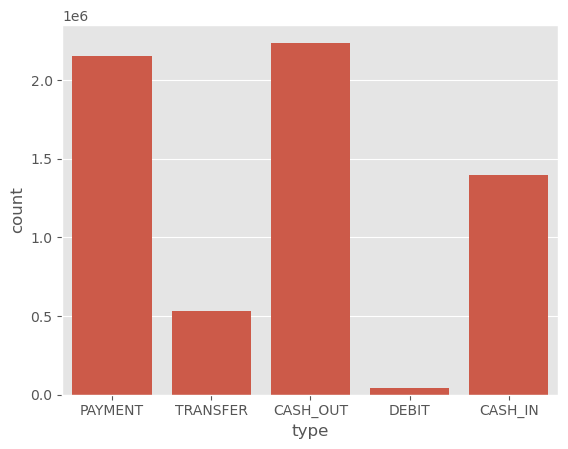

In [14]:
#type
sns.countplot(data=df,x= 'type')

<Axes: xlabel='amount', ylabel='Count'>

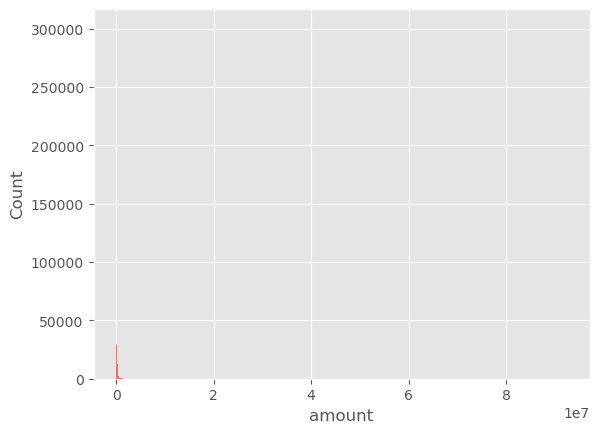

In [15]:
#amount
sns.histplot(data=df,x='amount')

<Axes: xlabel='amount'>

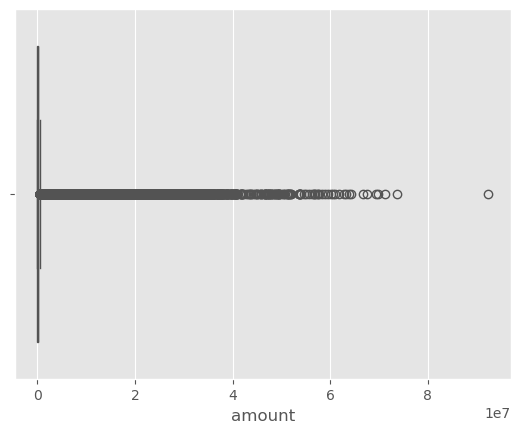

In [16]:
#amount
sns.boxplot(data=df,x='amount')

<Axes: xlabel='oldbalanceOrg', ylabel='Count'>

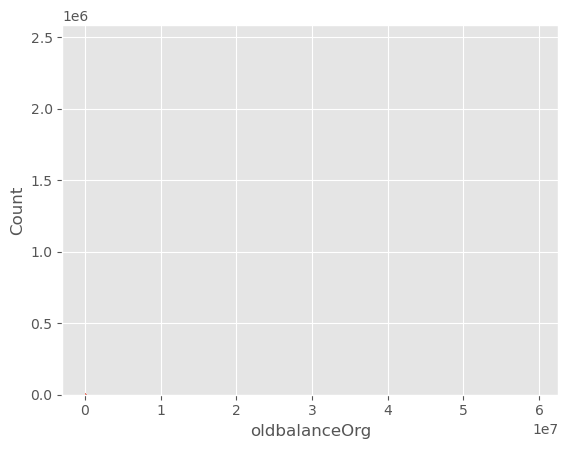

In [17]:
#oldbalanceOrg
sns.histplot(data = df , x = 'oldbalanceOrg')

In [18]:
#nameDest
df['nameDest'].value_counts()

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: count, Length: 2722362, dtype: int64

<Axes: xlabel='oldbalanceDest'>

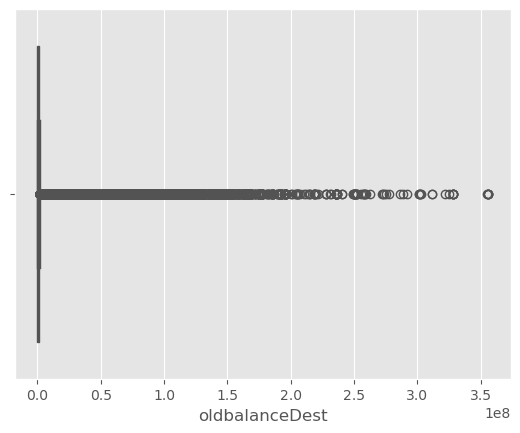

In [19]:
#oldbalanceDest
sns.boxplot(data=df,x='oldbalanceDest')

<Axes: xlabel='newbalanceDest'>

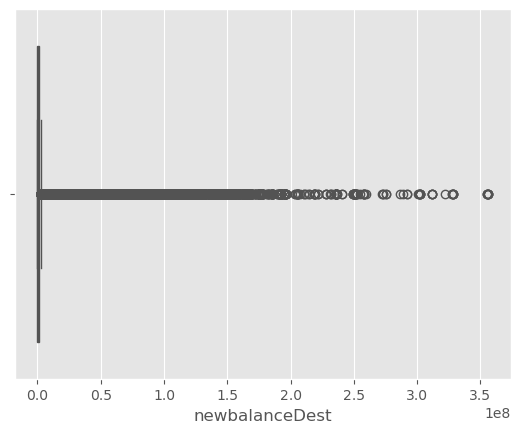

In [20]:
#newbalanceDest
sns.boxplot (data= df , x = 'newbalanceDest')

<Axes: xlabel='isFraud', ylabel='count'>

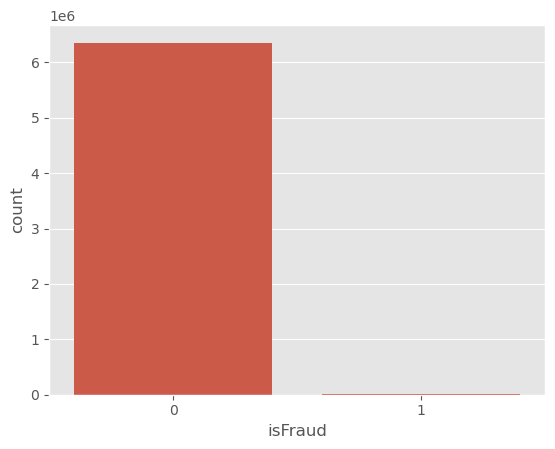

In [21]:
#isFraud:
sns.countplot(data=df,x='isFraud')

In [22]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [23]:
df.loc[df['isFraud']==0, 'isFraud'] = 'is not Fraud'
df.loc[df['isFraud']==1, 'isFraud'] = 'is Fraud'

In [24]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,is not Fraud
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,is not Fraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,is Fraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,is Fraud
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,is not Fraud
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,is Fraud
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,is Fraud
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,is Fraud
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,is Fraud


Bivariate analysis

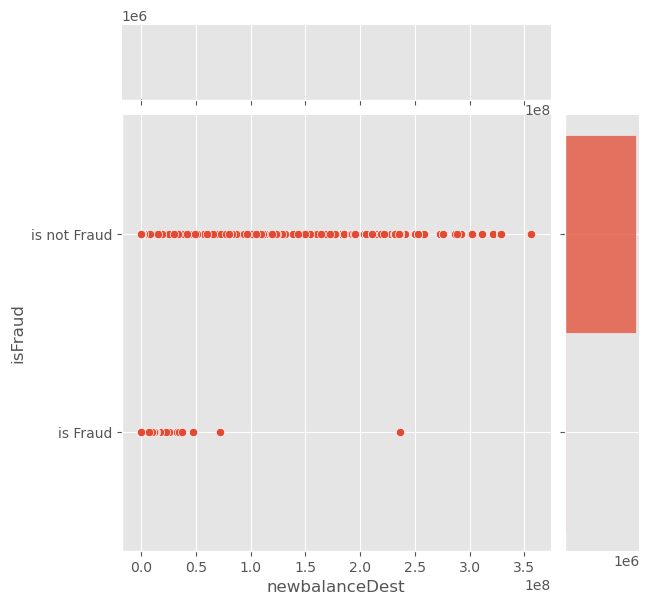

In [25]:
sns.jointplot(data=df,x='newbalanceDest', y='isFraud')

<Axes: xlabel='type', ylabel='count'>

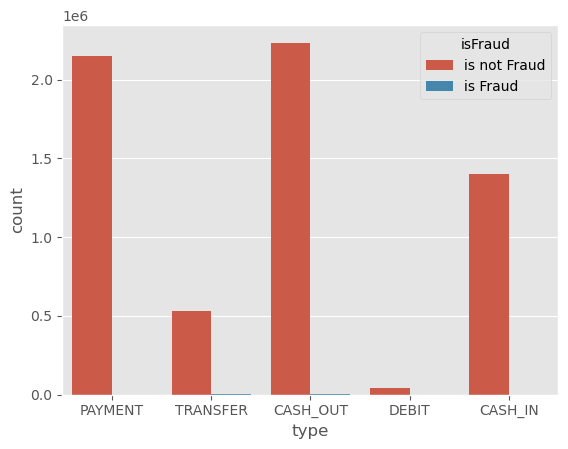

In [26]:
sns.countplot(data=df,x='type', hue='isFraud')

<Axes: xlabel='isFraud', ylabel='step'>

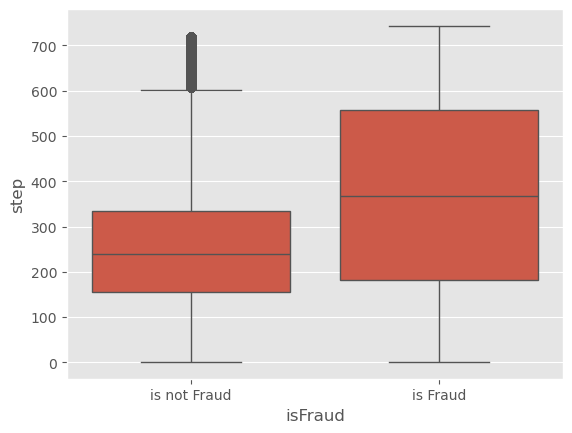

In [27]:
sns.boxplot(data=df,x='isFraud', y='step')

<Axes: xlabel='isFraud', ylabel='amount'>

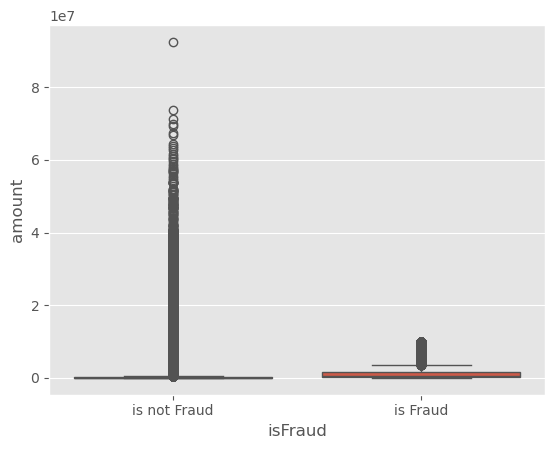

In [28]:
sns.boxplot(data=df,x='isFraud', y='amount')

<Axes: xlabel='isFraud', ylabel='oldbalanceOrg'>

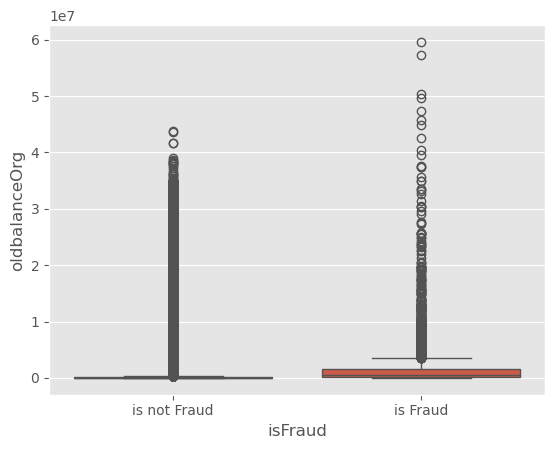

In [29]:
sns.boxplot(data=df,x='isFraud', y='oldbalanceOrg')

<Axes: xlabel='isFraud', ylabel='newbalanceOrig'>

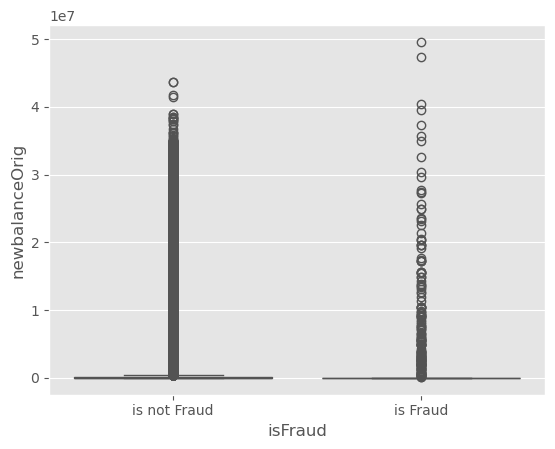

In [30]:
sns.boxplot(data=df, x = 'isFraud', y = 'newbalanceOrig')

<Axes: xlabel='isFraud', ylabel='oldbalanceDest'>

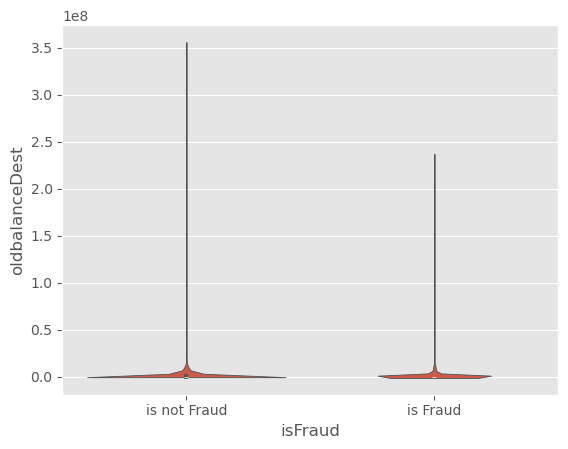

In [31]:
sns.violinplot(data = df, x = 'isFraud', y = 'oldbalanceDest')

<Axes: xlabel='isFraud', ylabel='newbalanceDest'>

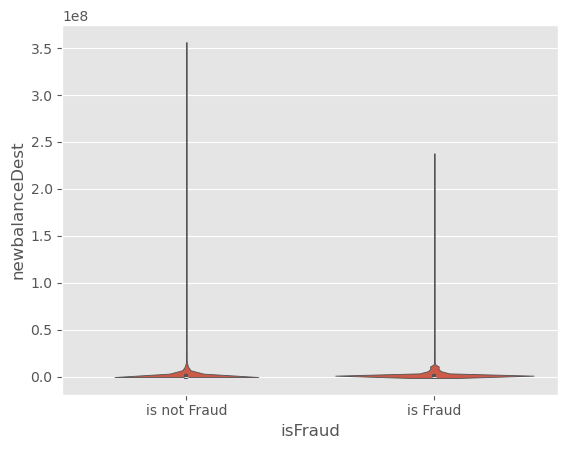

In [32]:
sns.violinplot(data=df, x = 'isFraud', y = 'newbalanceDest')

Descriptive analysis

In [33]:
df.describe (include='all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6362620,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620
unique,NaN,5,NaN,6353307,NaN,NaN,2722362,NaN,NaN,2
top,NaN,CASH_OUT,NaN,C1902386530,NaN,NaN,C1286084959,NaN,NaN,is not Fraud
freq,NaN,2237500,NaN,3,NaN,NaN,113,NaN,NaN,6354407
mean,2.433972e+02,NaN,1.798619e+05,NaN,8.338831e+05,8.551137e+05,NaN,1.100702e+06,1.224996e+06,NaN
std,1.423320e+02,NaN,6.038582e+05,NaN,2.888243e+06,2.924049e+06,NaN,3.399180e+06,3.674129e+06,NaN
min,1.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN
25%,1.560000e+02,NaN,1.338957e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN
50%,2.390000e+02,NaN,7.487194e+04,NaN,1.420800e+04,0.000000e+00,NaN,1.327057e+05,2.146614e+05,NaN
75%,3.350000e+02,NaN,2.087215e+05,NaN,1.073152e+05,1.442584e+05,NaN,9.430367e+05,1.111909e+06,NaN


Checking for null values

In [34]:
# Finding null values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         object 
dtypes: float64(5), int64(1), object(4)
memory usage: 485.4+ MB


Handling outliers

<Axes: ylabel='amount'>

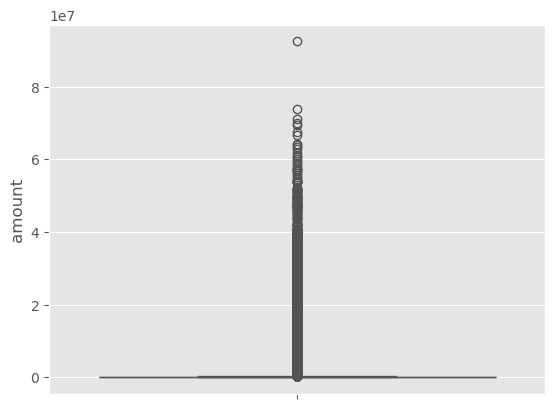

In [36]:
sns.boxplot(df['amount'])

In [37]:
# remove outliers
from scipy import stats
print(stats.mode(df['amount'])) 
print(np.mean (df ['amount']))

ModeResult(mode=np.float64(10000000.0), count=np.int64(3207))
179861.90354913071


In [38]:
q1= np.quantile(df['amount'],0.25)
q3= np.quantile(df['amount'], 0.75)

IQR = q3-q1

upper_bound = q3+(1.5*IQR)
lower_bound = q1-(1.5*IQR)

print('q1 :',q1)
print('q3:',q3)
print('IQR:', IQR)
print('Upper Bound', upper_bound)
print('Lower Bound', lower_bound)
print('Skewed data', len (df[df['amount']>upper_bound]))
print('Skewed data:',len (df [df['amount']<lower_bound]))

q1 : 13389.57
q3: 208721.4775
IQR: 195331.9075
Upper Bound 501719.33875
Lower Bound -279608.29125
Skewed data 338078
Skewed data: 0


In [39]:
#To handle outliers transformation techniques are used.
def transformationPlot(feature):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.distplot(feature)
    plt.subplot(1,2,2)
    stats.probplot(feature, plot=plt)

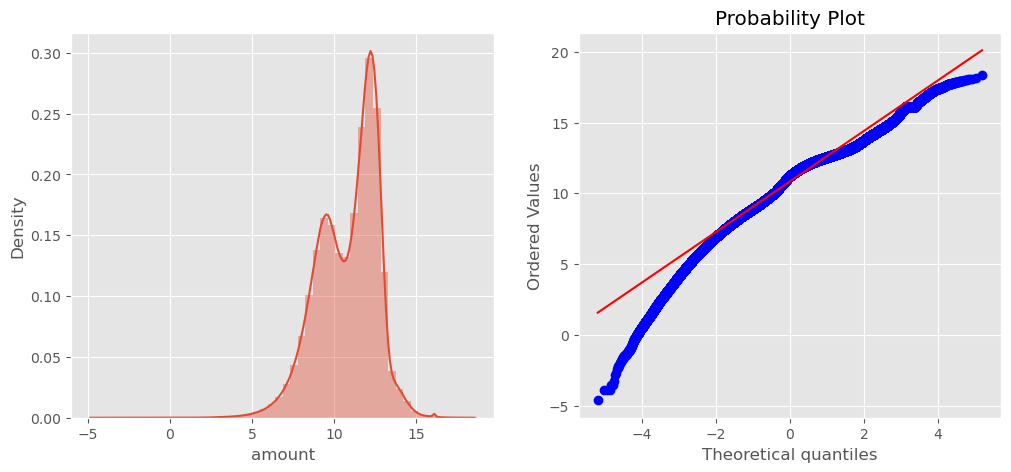

In [40]:
transformationPlot(np.log(df[df['amount'] > 0]['amount']))


Object data labelencoding

In [41]:
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()
df['type'] = la.fit_transform(df['type'])


In [42]:
df['type'].value_counts()

type
1    2237500
3    2151495
0    1399284
4     532909
2      41432
Name: count, dtype: int64

In [43]:
# dividing the dataset into dependent and independent y and x respectively
x = df.drop('isFraud', axis=1)
y = df['isFraud']


In [44]:
x

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,1,3,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00
1,1,3,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00
4,1,3,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00
...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13
6362616,743,4,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00
6362617,743,1,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11
6362618,743,4,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00


In [45]:
y

0          is not Fraud
1          is not Fraud
2              is Fraud
3              is Fraud
4          is not Fraud
               ...     
6362615        is Fraud
6362616        is Fraud
6362617        is Fraud
6362618        is Fraud
6362619        is Fraud
Name: isFraud, Length: 6362620, dtype: object

Splitting data into train and test

In [46]:
# Train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [47]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(5090096, 9)
(1272524, 9)
(1272524,)
(5090096,)


Random Forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier()

x_train = pd.get_dummies(x_train, drop_first=True)
x_test = pd.get_dummies(x_test, drop_first=True)

rfc.fit(x_train,y_train)
y_test_predict1=rfc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict1)
test_accuracy


In [ ]:
y_train_predict1=rfc.predict(x_train)
train_accuracy = accuracy_score(y_train,y_train_predict1)
train_accuracy

In [ ]:
pd.crosstab(y_test,y_test_predict1)

In [ ]:
print(classification_report(y_test,y_test_predict1))

Decision tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc-DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_test_predict2=dtc.predict(x_test)
test_accuracy = accuracy_score(y_test,y_test_predict2)
test_accuracy

In [ ]:
y_train_predict2=dtc.predict(x_train)
train_accuracy = accuracy_score(y_train,y_train_predict2)
train_accuracy

In [ ]:
pd.crosstab(y_test,y_test_predict2)


In [ ]:
print(classification_report(y_test,y_test_predict2))

ExtraTrees Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x_train,y_train)
y_test_predict3=etc.predict(x_test)
test_accuracy-accuracy_score(y_test,y_test_predict3)
test_accuracy

In [ ]:
y_train_predict3=etc.predict(x_train)
train_accuracy = accuracy_score(y_train,y_train_predict3)
train_accuracy


In [ ]:
pd.crosstab(y_test,y_test_predict3)

In [ ]:
print(classification_report(y_test,y_test_predict3))

SupportVectorMachine Classifier

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc= SVC()
svc.fit(x_train,y_train)
y_test_predict4=svc.predict(x_test)
test_accuracy-accuracy_score(y_test,y_test_predict4)
test_accuracy


In [ ]:
y_train_predict4=svc.predict(x_train)
train_accuracy-accuracy_score(y_train,y_train_predict4)
train_accuracy

In [ ]:
pd.crosstab(y_test,y_test_predict4)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_test_predict4))

In [ ]:
df.columns

In [ ]:
from sklearn.preprocessing import LabelEncoder

la = LabelEncoder()
y_train1 = la.fit_transform(y_train)

In [ ]:
y_test1=la.transform(y_test)

In [ ]:
y_test1=la.transform(y_test)

In [ ]:
y_test1

In [ ]:
y_train1

Xgboost Classifier

In [ ]:
import xgboost as xgb
xgb1 = xgb.XGBClassifier() 
xgb1.fit(x_train, y_train1)
y_test_predict5=xgb1.predict(x_test)
test_accuracy = accuracy_score(y_test1,y_test_predict5)
test_accuracy

In [ ]:
y_train_predict5=xgb1.predict(x_train)
train_accuracy=accuracy_score(y_train1,y_train_predict5)
train_accuracy

In [ ]:
pd.crosstab(y_test1,y_test_predict5)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix 
print(classification_report(y_test1,y_test_predict5))

Compare the models

In [ ]:
def compareModel():
    print("train accuracy for rfc", accuracy_score(y_train_predict1,y_train))
    print("test accuracy for rfc", accuracy_score(y_test_predict1,y_test))
    print("train accuracy for dtc", accuracy_score(y_train_predict2,y_train))
    print("test accuracy for tc", accuracy_score(y_test_predict2,y_test))
    print("train accuracy for etc", accuracy_score(y_train_predict3,y_train))
    print("test accuracy for etc", accuracy_score(y_test_predict3,y_test))
    print("train accuracy for svc", accuracy_score(y_train_predict4,y_train))
    print("test accuracy for svcc", accuracy_score(y_test_predict4,y_test))
    print("train accuracy for xgb1", accuracy_score(y_train_predict5,y_train1))
    print("test accuracy for xgb1", accuracy_score(y_test_predict5,y_test1))

Evaluating performance of the model and saving the model

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc= SVC()
svc.fit(x_train,y_train)
y_test_predict4=svc.predict(x_test)
test_accuracy-accuracy_score(y_test,y_test_predict4)
test_accuracy


In [ ]:
y_train_predict4-svc.predict(x_train)
train_accuracy = accuracy_score(y_train,y_train_predict4)
train_accuracy


In [ ]:
import pickle
pickle.dump(svc,open('payments.pkl', 'wb'))